<a href="https://colab.research.google.com/github/vishnupradeesh/Machine_Learning/blob/main/PRODUCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preprocess the Image:**

* Resize the image to a fixed size.
* Apply noise reduction techniques, such as Gaussian blur or median filtering.
* Enhance contrast and brightness to improve text readability.

**Detect the Box:**

* Train an object detection model on labeled data containing images with bounding boxes around the product ingredient details table.
* Use the trained model to predict bounding boxes for tables in new images.

**Extract Text Regions:**

* Use the detected bounding box coordinates to crop the image and extract the table region.
* Further segment the table region into individual text regions if needed.

**Perform OCR:**

* Apply OCR to each text region using Tesseract or another OCR library.
* Aggregate the recognized text from all text regions.

**Post-process Text:**

* Clean the extracted text by removing noise, punctuation, and other unwanted characters.
* Format the text into a structured representation, such as a dictionary or CSV file, for easy access and analysis.

MOUNT DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd
!cd drive/
!pwd
!ls

Mounted at /content/drive
/content
/content
drive  sample_data


INSTALL & IMPORT STATEMENTS

In [ ]:
!pip install opencv-python
!pip install Pillow
!pip install pytesseract
!sudo apt install tesseract-ocr

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2 # This import should now work
from google.colab.patches import cv2_imshow
import pytesseract as tess
from os import system
import numpy as np


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


DECLARATIONS

In [ ]:
imagePath = "/content/drive/MyDrive/Colab Notebooks/check.jpg"
width, height = 1080,1080
guassianKernel = (3,3)
medianBlur = 5
alphaWeight, betaWeight = 2, -2

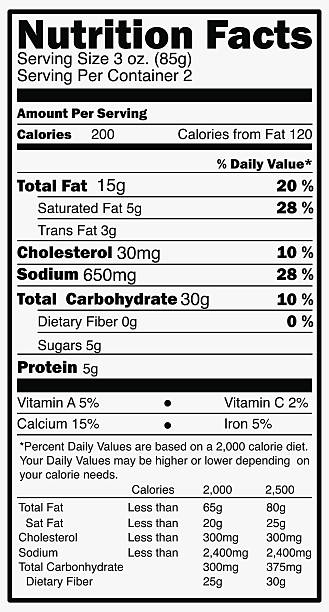

In [ ]:
import cv2
import numpy as np

# Read the image
image = cv2.imread(imagePath)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the color for highlighting (e.g., blue)
highlight_color = (120, 255, 255)  # Blue in HSV color space

# Mask the text regions based on the saturation and value channels
mask = cv2.inRange(hsv_image, np.array([0, 50, 50]), np.array([255, 255, 255]))

# Create a copy of the original image to apply the highlighting
highlighted_image = image.copy()

# Set the highlighted color for the text regions
highlighted_image[mask != 0] = highlight_color

# Save or display the highlighted image
cv2.imwrite('path/to/your/highlighted_image.jpg', highlighted_image)
# Or, to display the image
cv2_imshow(highlighted_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


PRE - PROCESS THE IMAGE

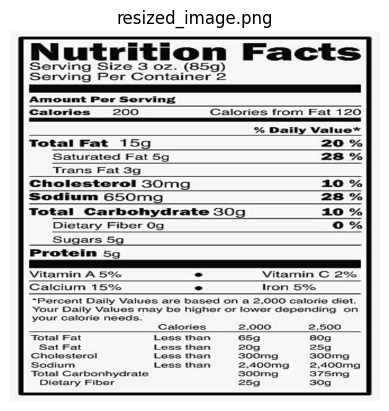

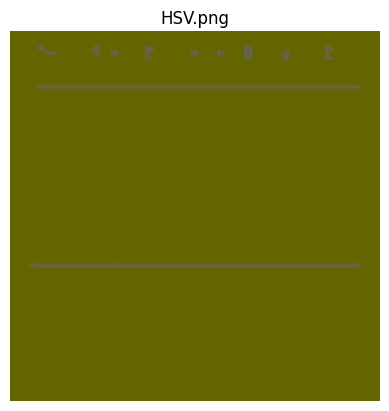

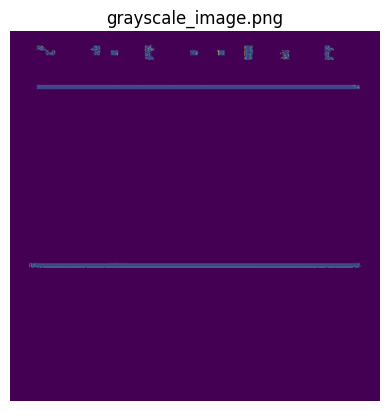

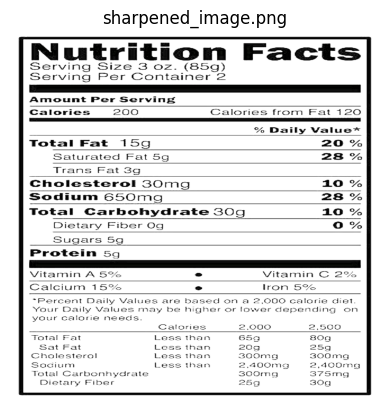

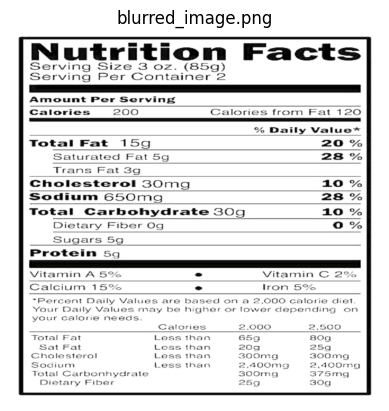

In [ ]:
# Resize the image to a fixed size.
resizeImage = Image.open(imagePath)
resizeImage = resizeImage.resize((width, height))
resizeImage.save("resized_image.png")
plt.imshow(resizeImage)
plt.title("resized_image.png")
plt.axis('off')
plt.show()

# Gray Image
# image = Image.open("/content/blurred_image.jpg")
# grayscale_image = image.convert("L")
# grayscale_image.save("grayscale_image.png")
# gray_image = cv2.imread("grayscale_image.png")
# plt.imshow(gray_image)
# plt.title("grayscale_image.png")
# plt.axis('off')
# plt.show()

#Laplace filtered image
image = cv2.imread("resized_image.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
(h,s,v) = cv2.split(gray_image)
v[:] = 100
gray_image = cv2.merge((v, v, s))
cv2.imwrite('grayscale_image.png', gray_image)
plt.imshow(gray_image)
plt.title("HSV.png")
plt.axis('off')
plt.show()

rgb = cv2.cvtColor(gray_image, cv2.COLOR_HSV2RGB)
gray_image = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
cv2.imwrite('grayscale_image.png', gray_image)
plt.imshow(gray_image)
plt.title("grayscale_image.png")
plt.axis('off')
plt.show()

laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))
sharpened_image = cv2.addWeighted(image, alphaWeight, cv2.cvtColor(laplacian, cv2.COLOR_GRAY2BGR), betaWeight, 0)
cv2.imwrite('sharpened_image.png', sharpened_image)
plt.imshow(sharpened_image)
plt.title("sharpened_image.png")
plt.axis('off')
plt.show()


# Apply noise reduction techniques, such as Gaussian blur or median filtering.

image = cv2.imread("sharpened_image.png")
blurred_image = cv2.GaussianBlur(image, guassianKernel, 0, cv2.BORDER_DEFAULT)
cv2.imwrite('blurred_image.png', blurred_image)
plt.imshow(blurred_image)
plt.title("blurred_image.png")
plt.axis('off')
plt.show()


# filtered_image = cv2.medianBlur(blurred_image, medianBlur)
# cv2.imwrite('blurred_image.png', filtered_image)
# plt.imshow(filtered_image)
# plt.title("median_filtered_image.png")
# plt.axis('off')
# plt.show()











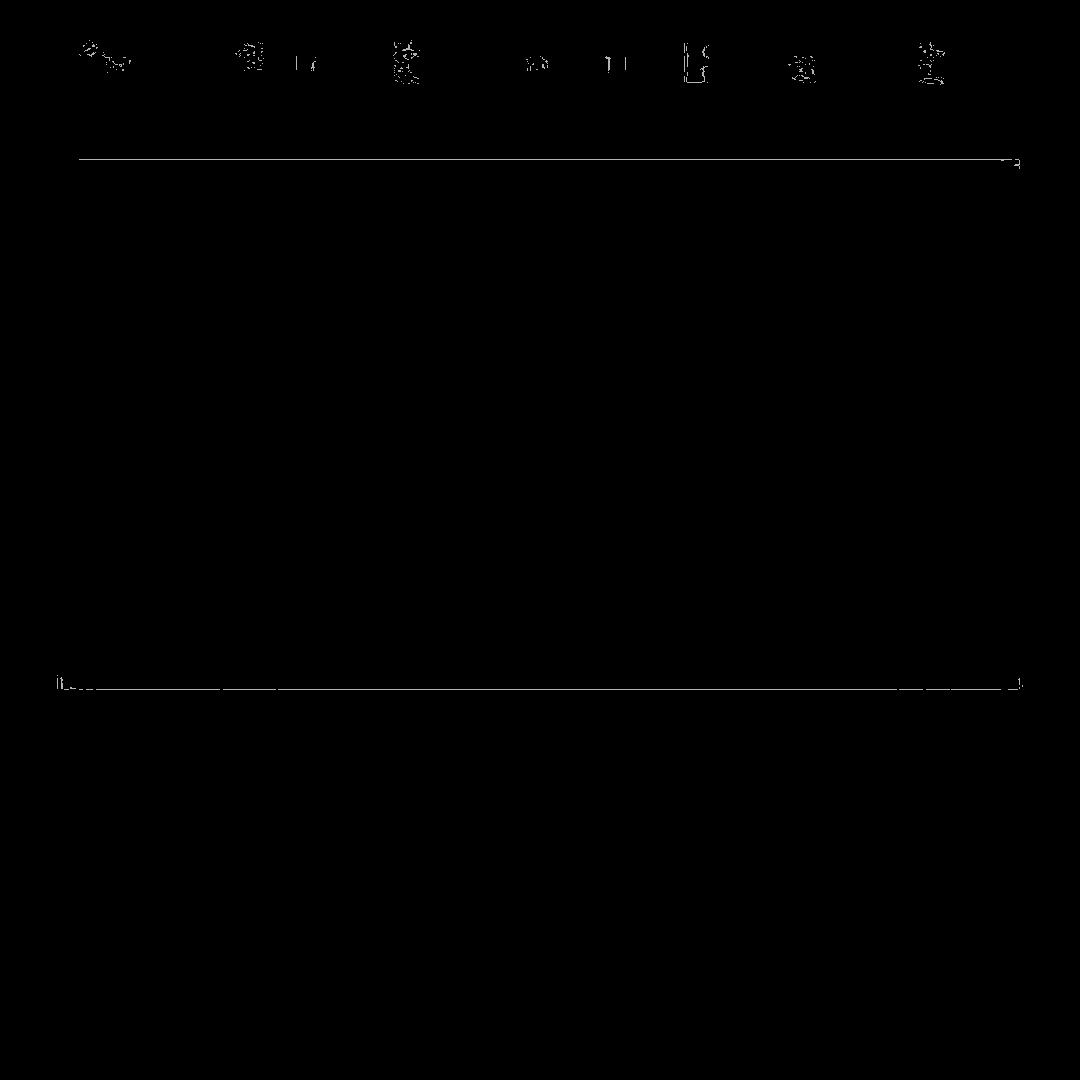

100.0


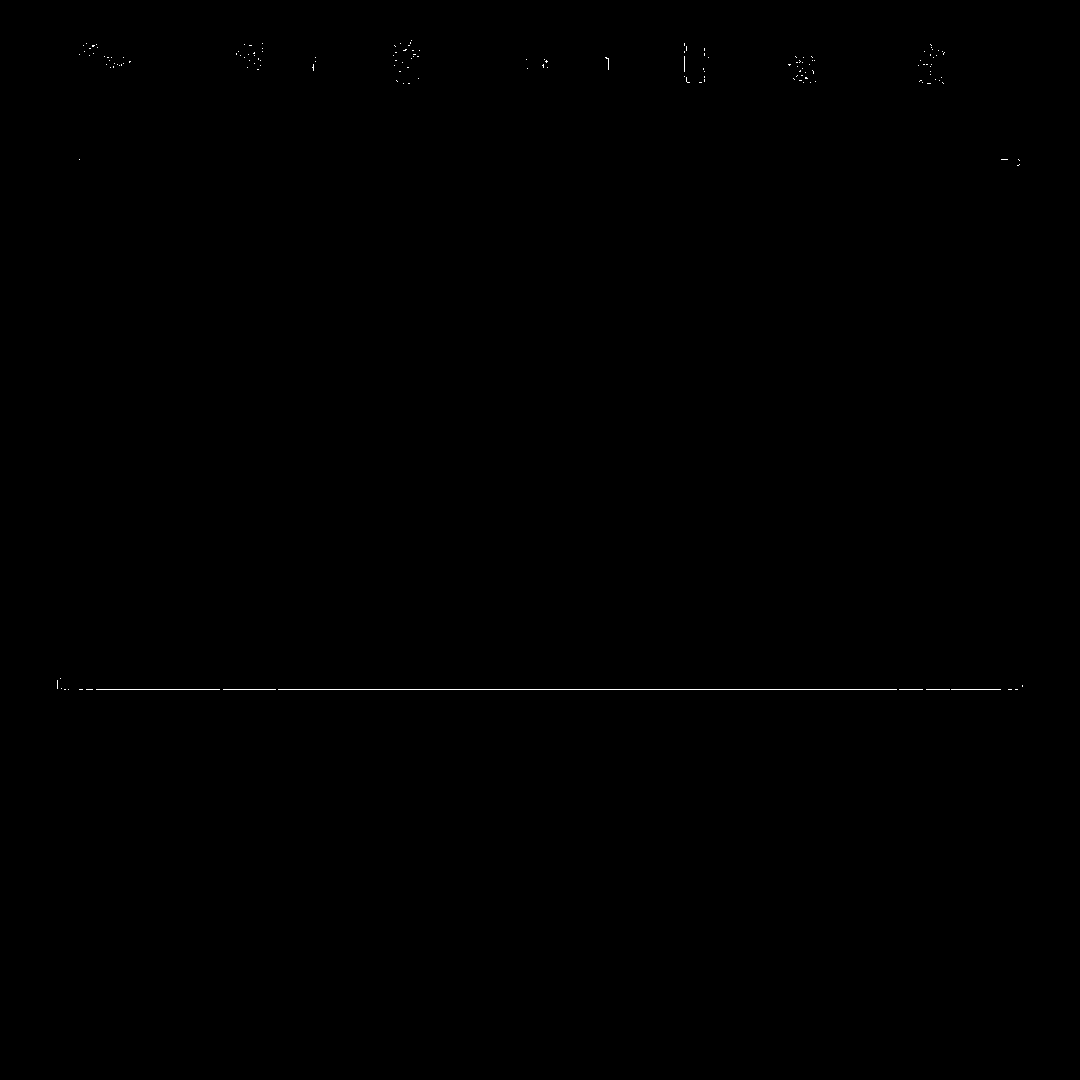

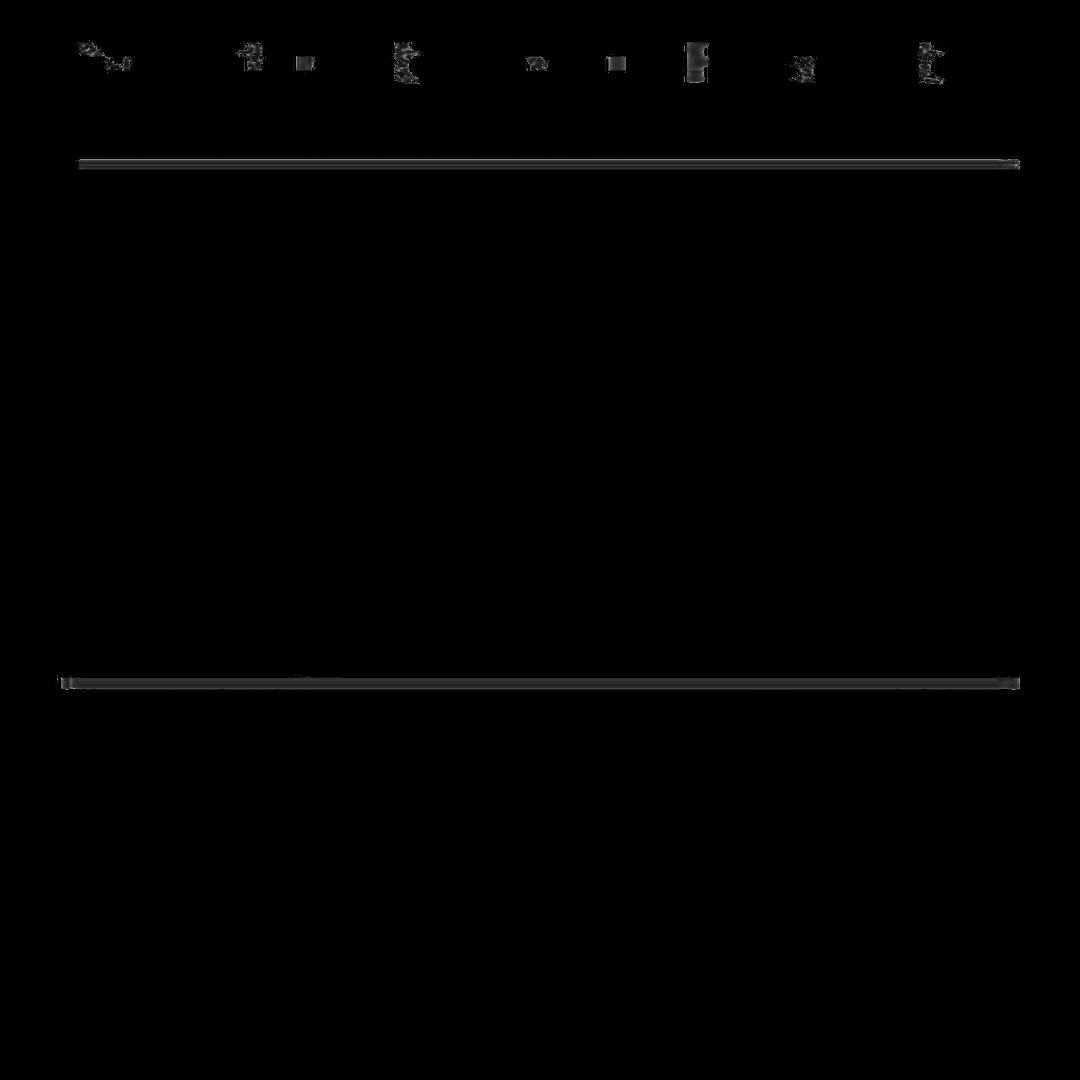

True

In [ ]:
img = cv2.imread("grayscale_image.png")
ret, thresh_binary = cv2.threshold(img, 100, 180, cv2.THRESH_BINARY)
cv2_imshow(thresh_binary)
cv2.imwrite("Thresh.png", thresh_binary)
print(ret)

# Convert the image to grayscale before creating the mask
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create the mask from the grayscale image
mask = cv2.threshold(gray_img, 190, 255, cv2.THRESH_BINARY)[1]
mask = mask.astype(np.uint8) # Ensure 8-bit

cv2_imshow(mask)

result = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)
cv2_imshow(result)
cv2.imwrite("glare.png", result)

ZOOMING INTO BOX IN AN IMAGE

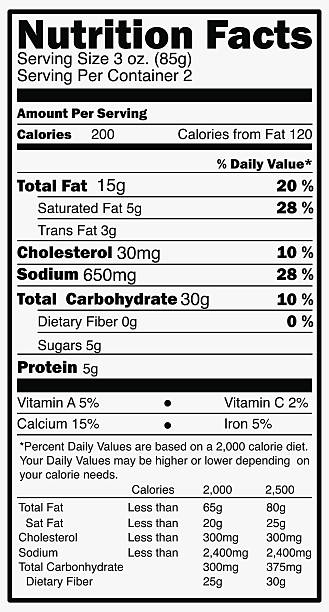

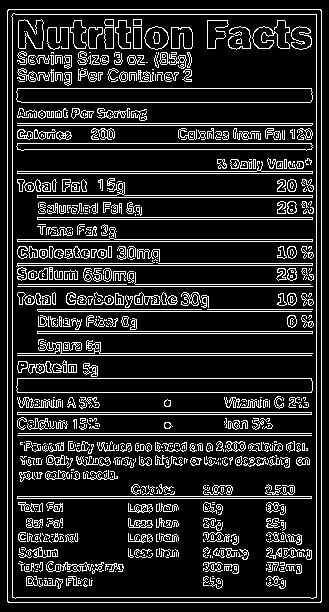

Nutrition Facts

Serving Size 3 oz. (85g)
Serving Per Container 2

Amount Per Serving
Calories 200 Calories from Fat 120
a

% Daily Value*

Total Fat 159 20%

Saturated Fat 5g 28 %
Trans Fat 3g

Cholesterol 30mg 10 %

Sodium 650mg 28 %

Total Carbohydrate 30g 10 %
Dietary Fiber 0g 0%

Sugars 5g
Protein 5g

 

 

 

 

Vitamin A 5% e Vitamin C 2%
Calcium 15% ° Iron 5%

*Percent Daily Values are based on a 2,000 calorie diet.
Your Daily Values may be higher or lower depending on
your calorie needs.

 

Calories 2,000 2,500
Total Fat Less than 65g 80g
Sat Fat Less than 20g 259
Cholesterol Less than 300mg 300mg
Sodium Less than 2,400mg  2,400mg
Total Carbonhydrate 300mg 375mg
Dietary Fiber 25g 30g

 

 



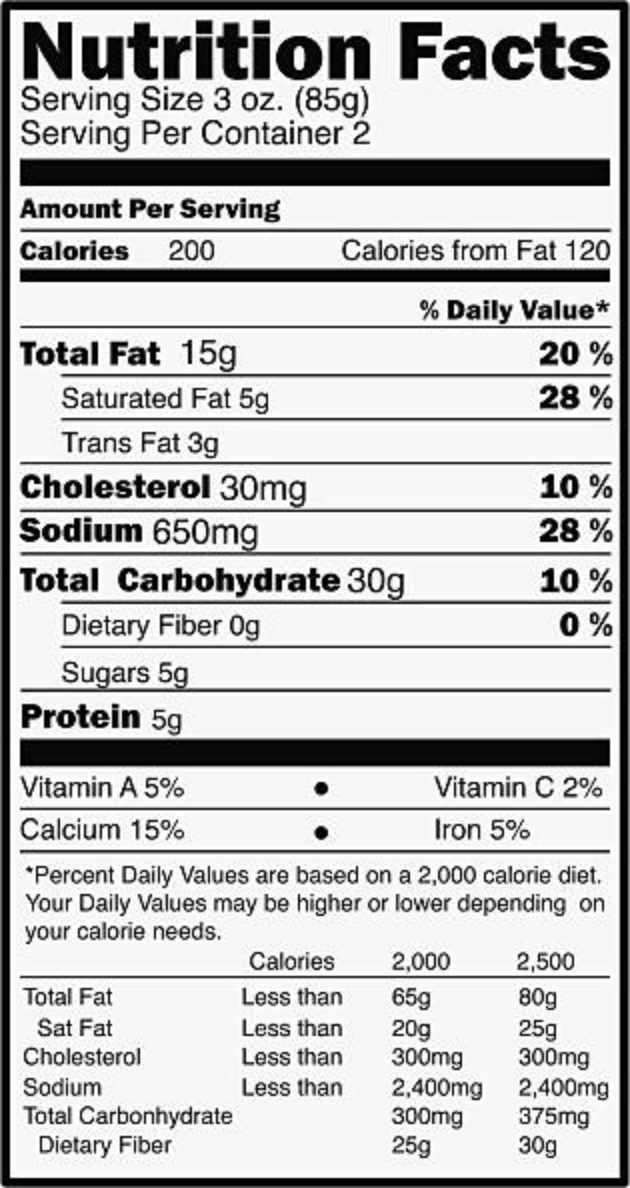

In [ ]:
def zoomBoxInImage():

  image = cv2.imread(imagePath)
  cv2_imshow(image)
  edges = cv2.Canny(image, 100, 200)
  cv2_imshow(edges)

  contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  for contour in contours:
      x, y, w, h = cv2.boundingRect(contour)
      aspect_ratio = w / float(h)
      area = cv2.contourArea(contour)
      if aspect_ratio > 0.5 and aspect_ratio < 2 and area > 1000:
          box_roi = image[y:y+h, x:x+w]
          # Resize the box ROI to zoom in
          zoomed_roi = cv2.resize(box_roi, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_LINEAR)
          # Convert the zoomed ROI to PIL image format
          zoomed_pil_image = Image.fromarray(cv2.cvtColor(zoomed_roi, cv2.COLOR_BGR2RGB))
          # Use pytesseract to perform OCR on the zoomed-in image
          zoomed_text = tess.image_to_string(zoomed_pil_image)
          # Print the extracted text
          print(zoomed_text)
          # Display the zoomed-in image
          cv2_imshow(zoomed_roi)

zoomBoxInImage()

CAPTURE AN IMAGE OR LOAD AN IMAGE

In [ ]:

def captureImage():








  system("tesseract -l eng /Thresh.png text.txt")
  img = Image.open('Thresh.png')
  Text = tess.image_to_string(img)
  print(Text)


captureImage()

DATA AUGUMENTATION

In [ ]:
def dataAugment():
  pass


FEED INTO MODEL

In [ ]:
def feedModel():
  pass

PRODUCT CALCULATOR

In [ ]:
def calcProduct():
  pass

DECISION MAKING

In [ ]:
def decision():
  pass

MAIN FUNCTION

In [ ]:
captureImage()
dataAugment()
feedModel()
calcProduct()
decision()